<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/CustomYolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Sep  2 15:50:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
# !ls /mydrive

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/mydrive/yolov3"

mkdir: cannot create directory ‘/mydrive/yolov3’: File exists


In [ ]:
!echo "pipe" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data
!mkdir data/obj

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-09-02 16:03:50--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  20.7MB/s    in 8.2s    

2021-09-02 16:03:59 (18.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!unzip /mydrive/yolov3/images.zip -d data/obj

In [ ]:
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/images/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

In [ ]:
import glob
images_list = glob.glob("data/obj/images/*.jpg")
print(images_list)

['data/obj/images/UNS-N08020-Alloy-20-Pipes.jpg', 'data/obj/images/Carbon-Steel-Seamless-Welded-Pipes-Manufacturers-Suppliers-1024x575.jpg', 'data/obj/images/images (60).jpg', 'data/obj/images/images (64).jpg', 'data/obj/images/images (27).jpg', 'data/obj/images/images (29).jpg', 'data/obj/images/images (18).jpg', 'data/obj/images/1551730634-3802.jpg', 'data/obj/images/images (25).jpg', 'data/obj/images/images (7).jpg', 'data/obj/images/images (62).jpg', 'data/obj/images/images (41).jpg', 'data/obj/images/images (33).jpg', 'data/obj/images/images (58).jpg', 'data/obj/images/Hot-Sale-Socket-Glue-Connection-PVC-Pipe-Water-Pipe-Water-Supply-Agricultural-Irrigation-Drainage-Plastic-Pipe.jpg', 'data/obj/images/images (2).jpg', 'data/obj/images/images (39).jpg', 'data/obj/images/wrought-iron-pipe.jpg', 'data/obj/images/pipes-in-a-stack.jpg', 'data/obj/images/images (28).jpg', 'data/obj/images/images (45).jpg', 'data/obj/images/images (47).jpg', 'data/obj/images/images (3).jpg', 'data/obj/ima

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

In [ ]:
#pipe

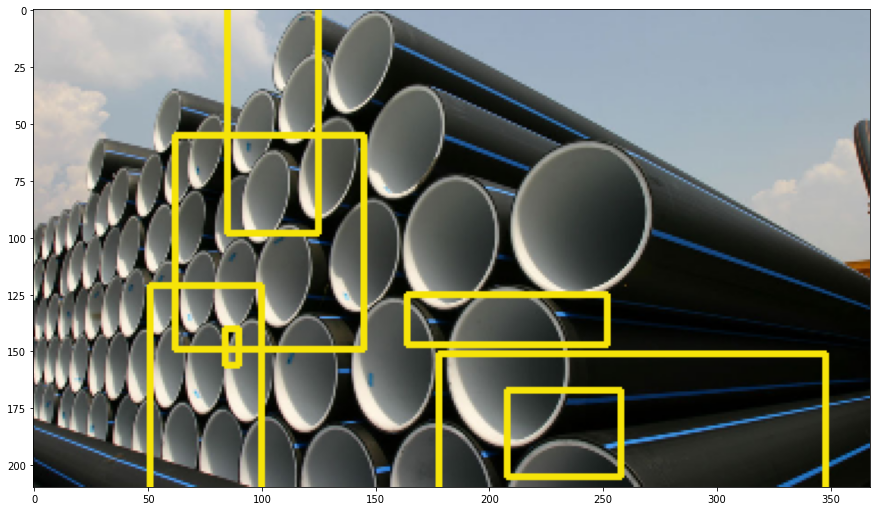

In [46]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights", "/content/yolov3_testing.cfg")

# Name custom object
classes = [""]

# Images path
images_path = glob.glob(r"/content/3.jpg")


plt.figure(figsize=(15,15))
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.55:
                # Object detected
                #print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    #print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
    plt.show()
    #cv2_imshow(img)